<a href="https://colab.research.google.com/github/gbessardon/Create_plots/blob/main/Dublin_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rasterio

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
#from mpl_toolkits.basemap import Basemap
from osgeo import gdal
import xarray as xr
import rasterio
from affine import Affine
import zipfile
import os

# Create Colormap ECOCLIMAP and legend



In [ ]:
def cover_fraction(filename):
    data=open(filename)
    covernum=[]
    covername=[]
    cityfrac=[]
    vegfrac=[]
    inwaterfrac=[]
    seafrac=[]
    for i,d in enumerate(data):
        if i==0:
            fieldnames=d.split(',')
            covername.append('no data')
            cityfrac.append(0.0)
            vegfrac.append(0.0)
            inwaterfrac.append(0.0)
            seafrac.append(0.0)
        else:
#            print(d.split(','))
            covernum.append(int(d.split(',')[0]))
            covername.append(d.split(',')[1])
            cityfrac.append(float(d.split(',')[2]))
            vegfrac.append(float(d.split(',')[3]))
            inwaterfrac.append(float(d.split(',')[4]))
            seafrac.append(float(d.split(',')[5]))
    return(fieldnames,np.array(covernum),covername,np.array(cityfrac),np.array(vegfrac),
           np.array(inwaterfrac),np.array(seafrac))

In [ ]:
covernamef='/content/drive/MyDrive/ECOCLIMAP_SG/ECOCLIMAP_SG_cover_data.csv'
(fieldnames,covernum,covername,cityfrac,vegfrac,inwaterfrac,seafrac)=cover_fraction(covernamef)
c0=(0/255.0,0/255.0,0/255.0,255/255.0)## 0 value
c1=(0/255.0,0/255.0,128/255.0,255/255.0)##navy blue 1.sea    
c2=(0/255.0,0/255.0,205/255.0,255/255.0)## mediumblue 2.inland waters
c3=(0/255.0, 0/255.0, 255/255.0, 255/255.0) ##Blue 3.rivers
c4=(211/255.0,211/255.0,211/255.0,255/255.0)## lightgray 4.Bare land
c5=(169/255.0,169/255.0,169/255.0,255/255.0)## darkgray 5.Rocks
c6=(255/255.0,250/255.0,250/255.0,255/255.0) ## Snow 6.permanent snow
c7=(240/255.0,255/255.0,240/255.0,255/255.0)## Honeydew 7.boreal broadleaf deciduous
c8=(85/255.0,107/255.0,47/255.0,255/255.0)## darkolivegreen 8.temperate broadleaf deciduous
c9=(154/255.0,205/255.0,50/255.0,255/255.0)## yellowgreen 9.tropical broadleaf deciduous
c10=(0/255.0,128/255.0,0/255.0,255/255.0)## green 10.temperate broadleaf evergreen
c11=(255/255.0,127/255.0,80/255.0,255/255.0)## coral 11. tropical broadleaf evergreen
c12=(160/255.0,82/255.0,45/255.0,255/255.0)## siena 12. boreal needleaf evergreen
c13=(34/255.0,139/255.0,34/255.0,255/255.0)## forest green 13.temperate needleleaf evergreen
c14= (188/255.0,143/255.0,143/255.0,255/255.0)## rosybrown 14. boreal needleleaf deciduous
c15=(205/255.0,133/255.0,63/255.0,255/255.0)## peru 15. shrubs
c16=(222/255.0,184/255.0,135/255.0,255/255.0)##  burlywood 16. boreal grassland
c17=(50/255.0,205/255.0,50/255.0,255/255.0)##limegreen 17 . temperate grassland
c18=(255/255.0,215/255.0,0/255.0,255/255.0) ##gold 18. tropical grassland
c19=(32/255.0,178/255.0,170/255.0,255/255.0)##lightseagreen 19.winter crop
c20=(173/255.0,255/255.0,47/255.0,255/255.0)##green yellow 20.summer crop
c21=(189/255.0,183/255.0,107/255.0,255/255.0)##darkkhaki 21. C4 crops
c22=(102/255.0,102/255.0,0/255.0,255/255.0)## Dark yellow3 22.flooded trees
c23=(46/255.0,139/255.0,87/255.0,255/255.0)## seagreen 23.flooded grassland
c24=(138/255.0,2/255.0,0/255.0,255/255.0)## 24. red LCZ1
c25=(206/255.0,0/255.0,0/255.0,255/255.0)## 25. red LCZ2
c26=(252/255.0,1/255.0,1/255.0,255/255.0)## 26. red LCZ3
c27=(255/255.0,90/255.0,0/255.0,255/255.0)## 27. red LCZ4
c28=(255/255.0,120/255.0,0/255.0,255/255.0)## 28. red LCZ5
c29=(255/255.0,150/255.0,0/255.0,255/255.0)## 29. red LCZ6
c30=(255/255.0,180/255.0,0/255.0,255/255.0)## 30. red LCZ7
c31=(255/255.0,210/255.0,0/255.0,255/255.0)## 31.red LCZ8
c32=(255/255.0,240/255.0,0/255.0,255/255.0)## 32. red LCZ9
c33=(128/255.0,128/255.0,128/255.0,255/255.0)## 33. gray LCZ10
scheme=[c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33]
colSG = ListedColormap(scheme)

#Get ECOCLIMAP data



In [ ]:
# Reads ecoclimap SG data and extracts the data between the max/min latitude and max/min longitude
def get_dataSG(fname,latmax,latmin,lonmax,lonmin):

    gdal.UseExceptions()
    dinputf = gdal.Open(fname)
    output='tempSG.tif'    
    gdal.Translate(output,dinputf,projWin=[lonmin,latmax,lonmax,latmin])
    ds=gdal.Open(output)
    data = ds.ReadAsArray()
    gt = ds.GetGeoTransform()
    #
    #
    #
    xres = gt[1]
    yres = gt[5]
    #
    xmin = gt[0]
    ymin = gt[3]
    #
    xmax = gt[0] + (xres * ds.RasterXSize)
    ymax = gt[3] + (yres * ds.RasterYSize)
#    else:
#        xmax = gt[0] + (xres * ds.RasterXSize) 
#        ymax = gt[3] + (yres * ds.RasterYSize) 


    X=np.arange(xmin+xres,xmax+xres,xres)
    Y=np.arange(ymin+yres,ymax+yres,yres)


    #Chunck the data to save RAM for plotting
    #Ydecreasing
    #b=np.min(np.where(Y<latmin)[0])
    #a=np.max(np.where(Y>latmax)[0])

    #c=np.max(np.where(X<lonmin)[0])
    #d=np.min(np.where(X>lonmax)[0])

#    print(np.max(data))
#    print(np.min(data))
    #ECOCLIMAP data have no projections so no need to reproject the data
    #to be verified for other datasets
    LAT=Y
    LON=X
    D=data

    return (LAT,LON,D)

In [ ]:
def get_LCZ(fname):
    gdal.UseExceptions()
    dinputf = gdal.Open(fname)
    res = dinputf.GetGeoTransform()[1]
    output='temp.tif'
    gdal.Warp(output,dinputf,dstSRS='EPSG:4326')
    gdal.UseExceptions()
    ds = gdal.Open(output)
    data = ds.ReadAsArray()
    gt = ds.GetGeoTransform()
    xres = gt[1]
    yres = gt[5]
    #
    xmin = gt[0]
    ymin = gt[3]
    #
    xmax = gt[0] + (xres * ds.RasterXSize)
    ymax = gt[3] + (yres * ds.RasterYSize)
    #    else:
    #        xmax = gt[0] + (xres * ds.RasterXSize) 
    #        ymax = gt[3] + (yres * ds.RasterYSize) 


    X=np.arange(xmin+xres,xmax+xres,xres)
    Y=np.arange(ymin+yres,ymax+yres,yres)
    D=data
    D[data>100]=D[data>100]-90
    return (X,Y,D)

In [ ]:
lcznv=(255/255.0,255/255.0,255/255.0,255/255.0)## 0 value
lcz1=(138/255.0,2/255.0,0/255.0,255/255.0)## 24. red LCZ1
lcz2=(206/255.0,0/255.0,0/255.0,255/255.0)## 25. red LCZ2
lcz3=(252/255.0,1/255.0,1/255.0,255/255.0)## 26. red LCZ3
lcz4=(255/255.0,90/255.0,0/255.0,255/255.0)## 27. red LCZ4
lcz5=(255/255.0,120/255.0,0/255.0,255/255.0)## 28. red LCZ5
lcz6=(255/255.0,150/255.0,0/255.0,255/255.0)## 29. red LCZ6
lcz7=(255/255.0,180/255.0,0/255.0,255/255.0)## 30. red LCZ7
lcz8=(255/255.0,210/255.0,0/255.0,255/255.0)## 31.red LCZ8
lcz9=(255/255.0,240/255.0,0/255.0,255/255.0)## 32. red LCZ9
lcz10=(128/255.0,128/255.0,128/255.0,255/255.0)## 33. gray LCZ10
lczA=(34/255.0,139/255.0,34/255.0,255/255.0)## dense Tree
lczB=(0/255.0,171/255.0,1/255.0,255/255.0)
lczC=(99/255.0,132/255.0, 37/255.0,255/255.0)
lczD=(186/255.0,219/255.0,120/255.0,255/255.0)
lczE=(0.0/255.0,0.0/255.0,0.0/255.0,255/255.0)
lczF=(250/255.0,248/255.0,175/255.0,255/255.0)
lczG=(105/255.0,107/255.0,250/255.0,255/255.0)
schemeLCZ=[lcznv,lcz1,lcz2,lcz3,lcz4,lcz5,lcz6,lcz7,lcz8,lcz9,lcz10,lczA,lczB,lczC,lczD,lczE,lczF,lczG]
colLCZ = ListedColormap(schemeLCZ)

In [ ]:
covernameLCZ=['no data',
              'LCZ1: compact high-rise',
              'LCZ2: compact midrise',
              'LCZ3: compact low-rise',
              'LCZ4: open high-rise',
              'LCZ5: open midrise',
              'LCZ6: open low-rise',
              'LCZ7: lightweight low-rise',
              'LCZ8: large low-rise',
              'LCZ9: sparsely built',
              'LCZ10: heavy industry',
              'LCZA: desnse trees',
              'LCZB: scattered trees',
              'LCZC: bush scrub',
              'LCZD: low plants',
              'LCZE: Bare rock or paved',
              'LCZF: Bare soil or sand',
              'LCZG: Water'
              ]

In [ ]:
fname='/content/drive/MyDrive/Dublin.tif'
(X,Y,D)=get_LCZ(fname)

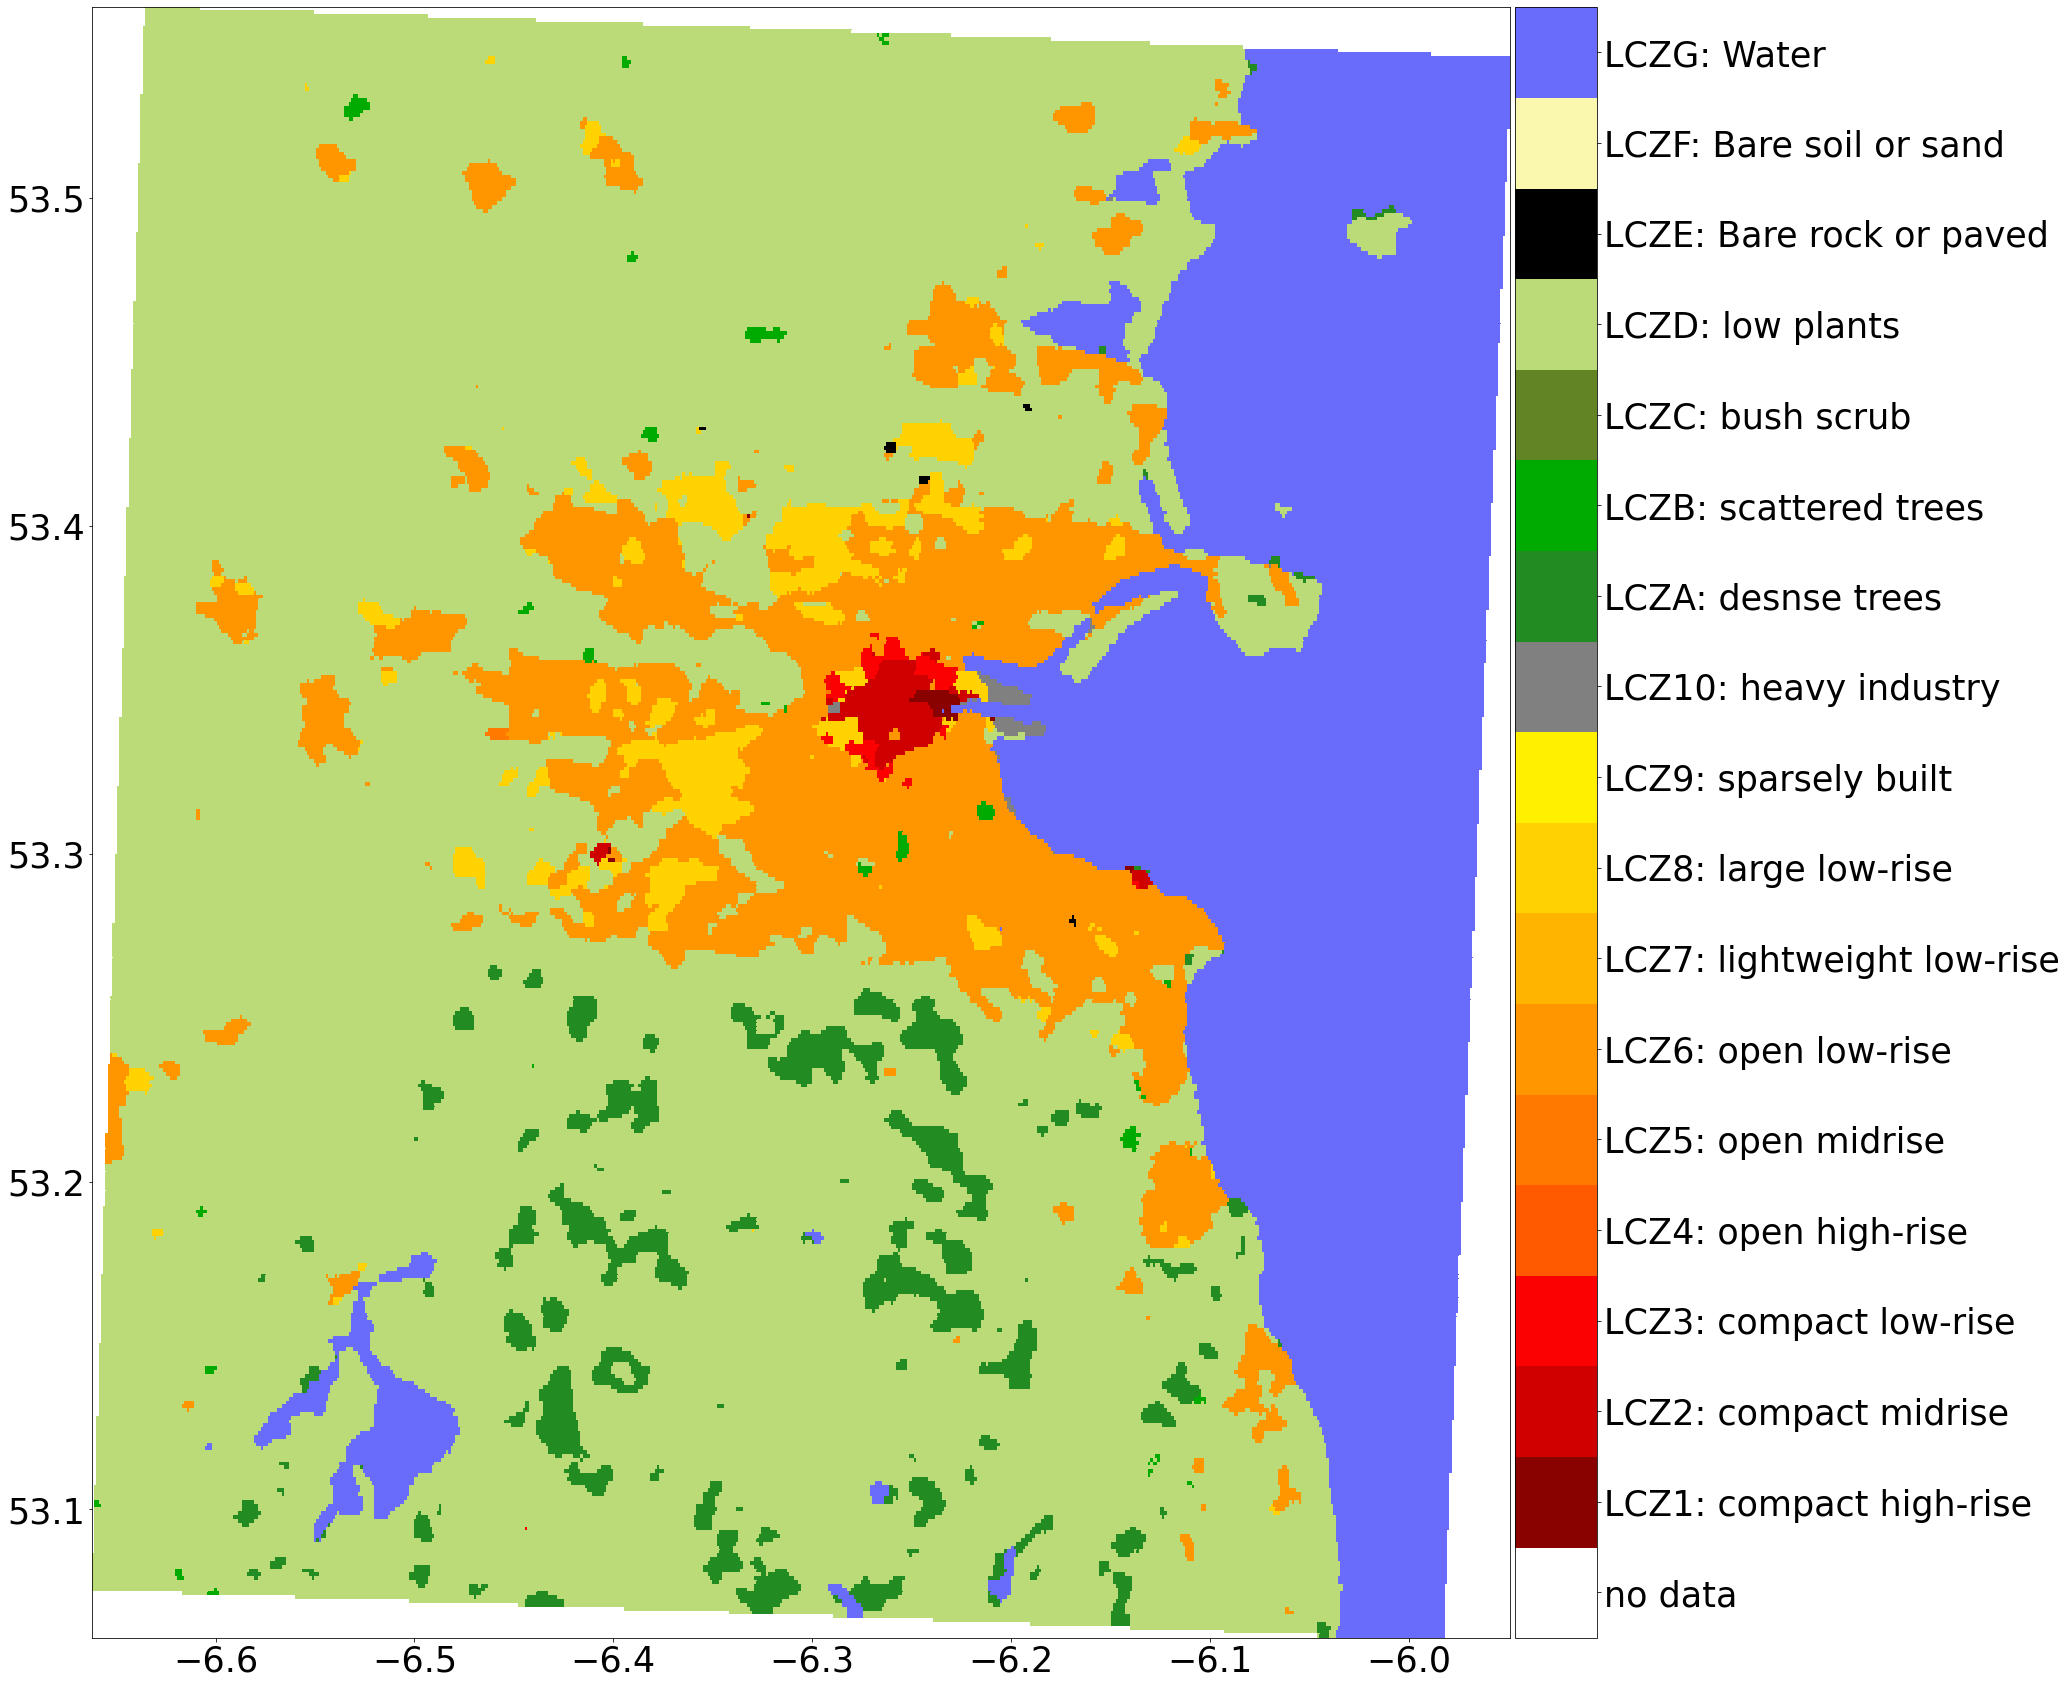

In [ ]:
fig, axs = plt.subplots(1, 1,figsize=(30, 30))
ax1=axs
LONg, LATg = np.meshgrid(X,Y)
c=ax1.pcolormesh(X,Y,D,cmap=colLCZ,vmin=0,vmax=len(covernameLCZ))
cb=plt.colorbar(c, ax=ax1, ticks=np.arange(0.5,len(covernameLCZ)),extendfrac='auto', spacing='proportional',pad=0.003)   
cb.set_ticklabels(covernameLCZ)
cb.ax.tick_params(labelsize=35)
ax1.tick_params(labelsize=35)
fig.savefig('Dublinwudb.png',format='png',quality=95,bbox_inches='tight')

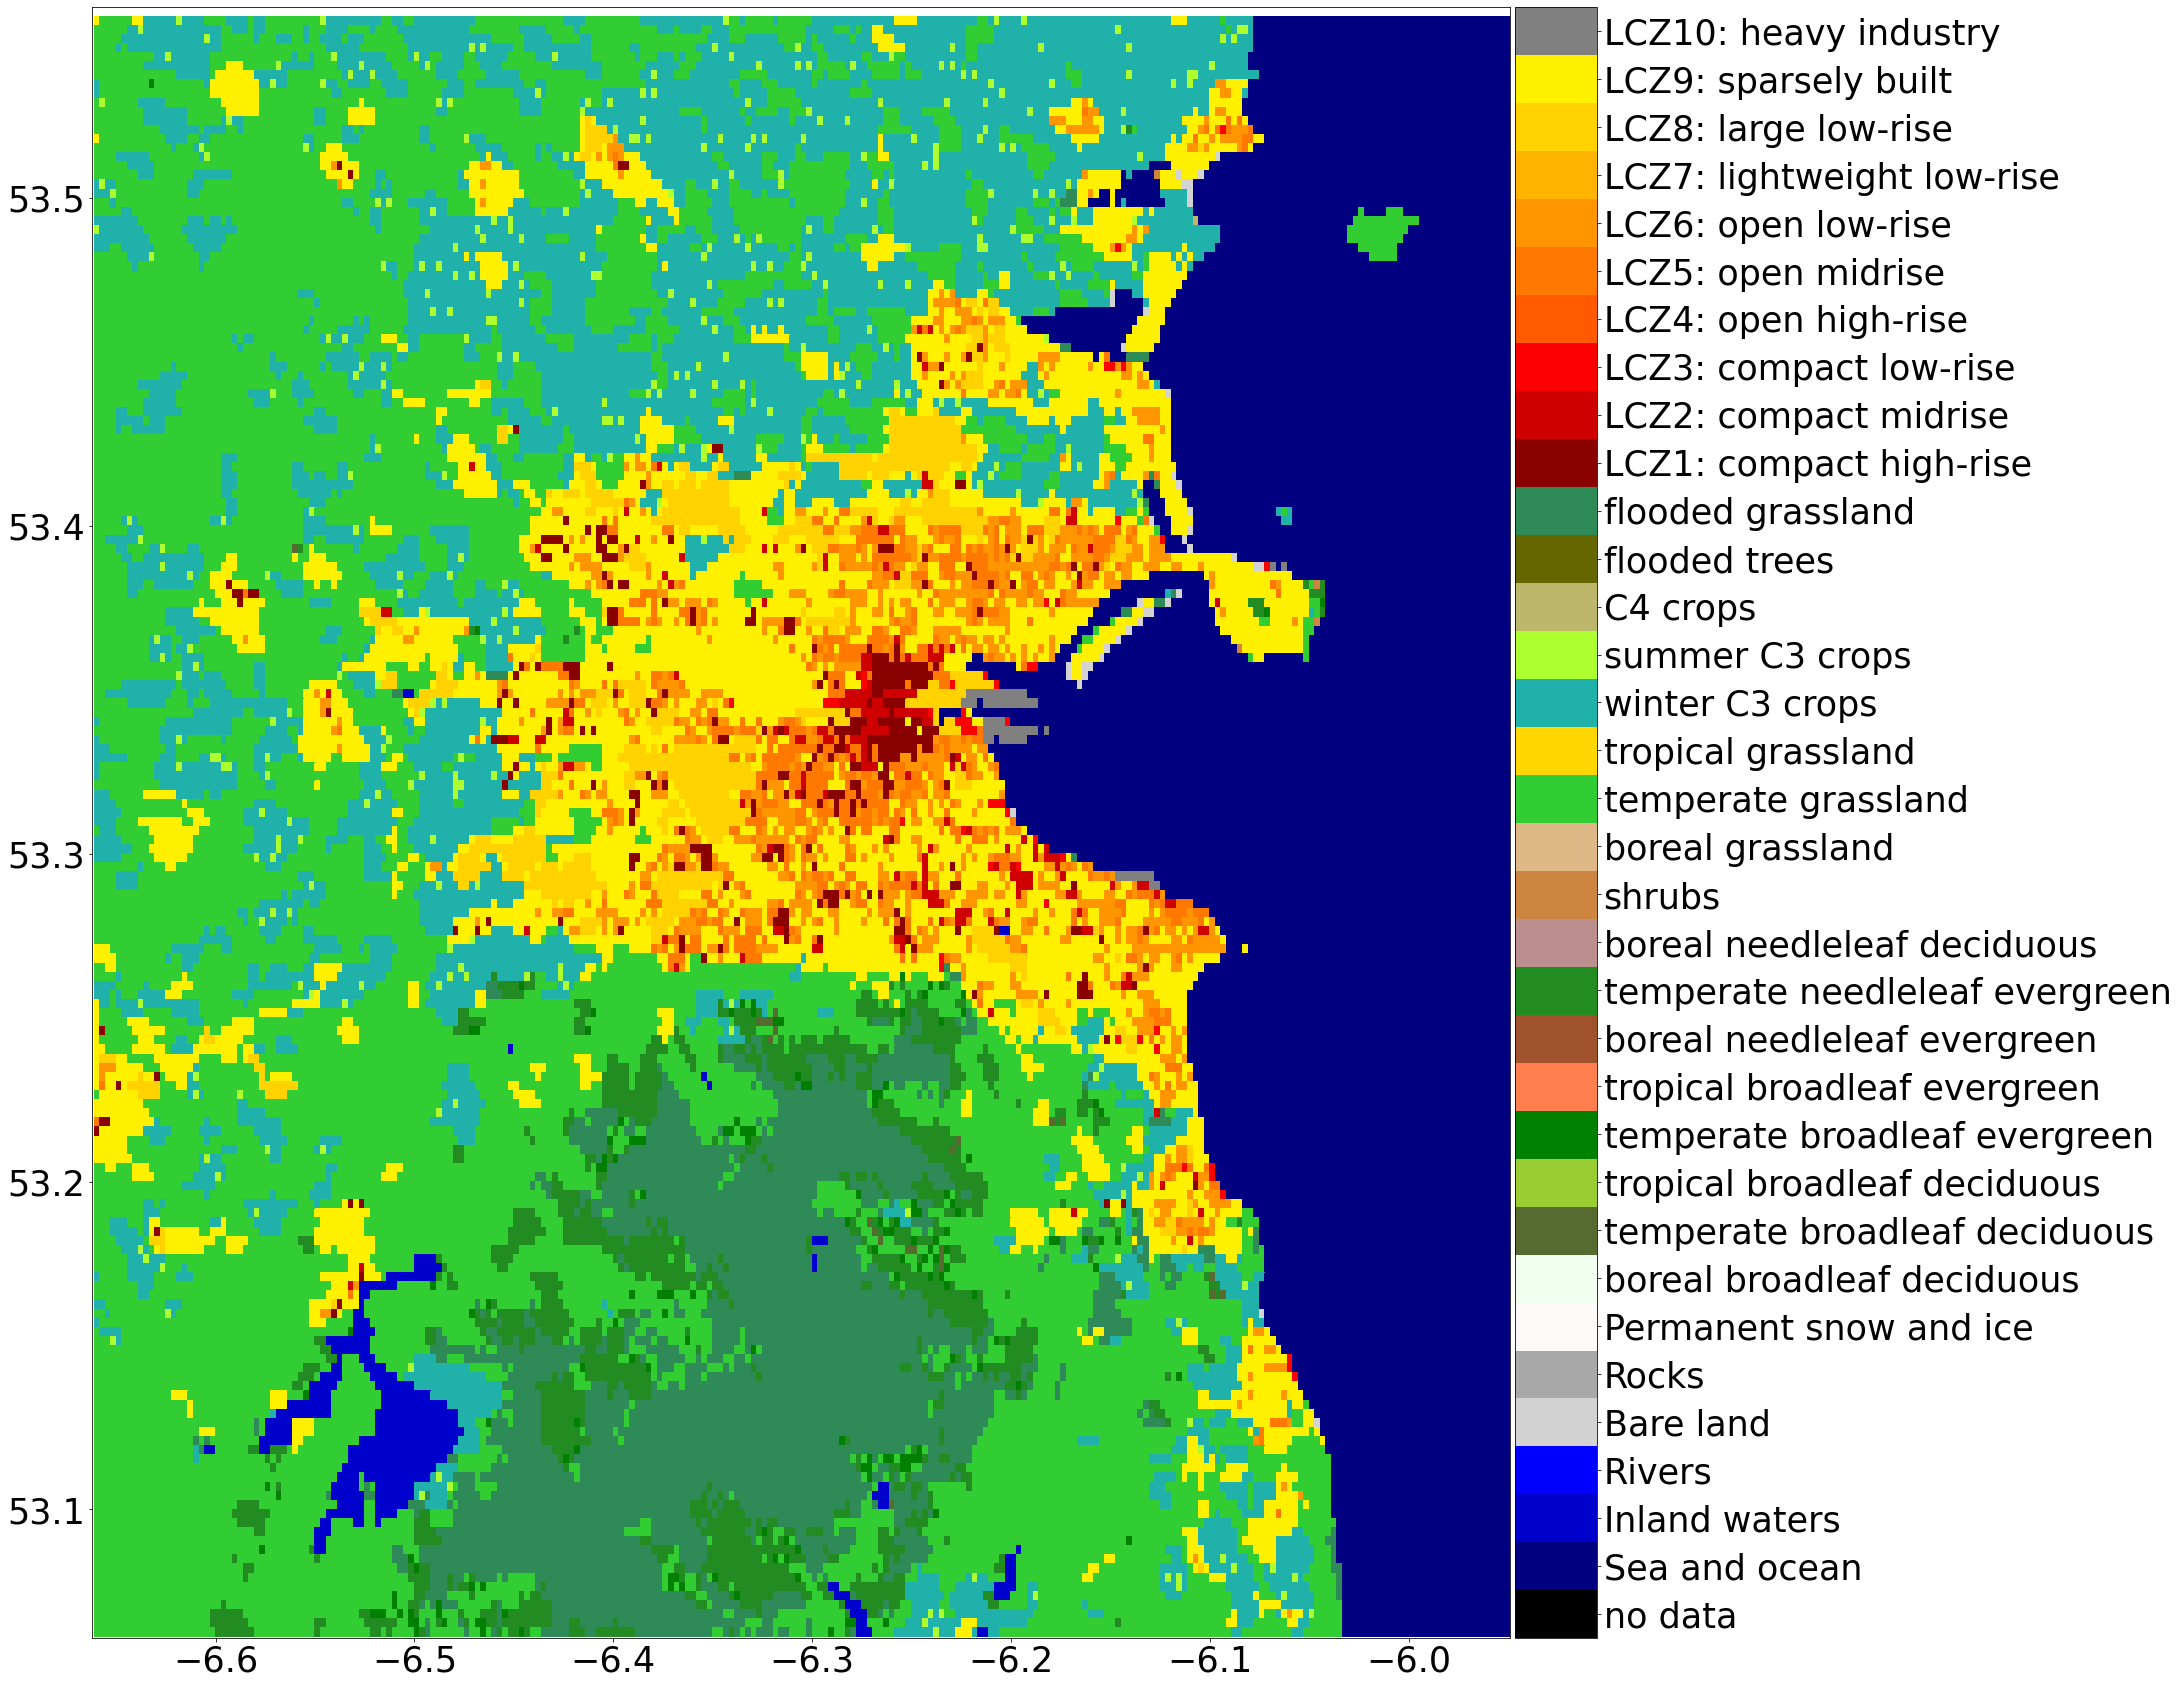

In [ ]:
latmax=np.max(Y)
latmin=np.min(Y)
lonmax=np.max(X)
lonmin=np.min(X)
fnameSG='/content/drive/MyDrive/ECOCLIMAP_SG/ecosg_final_map.dir'
(LATSG,LONSG,DSG)=get_dataSG(fnameSG,latmax,latmin,lonmax,lonmin)
fig, axs = plt.subplots(1, 1,figsize=(30, 30))
ax1=axs

LONg, LATg = np.meshgrid(LONSG,LATSG)
c=ax1.pcolormesh(LONSG,LATSG,DSG,cmap=colSG, vmin=0,vmax=len(covername))
ax1.set_xlim(lonmin,lonmax)
ax1.set_ylim(latmin,latmax)
#ax1.text(-7.315552,54.047338, 'Ballyhaise',fontsize=35)
#ax1.text(-7.377130,54.045211, 'Butlers Bridge',fontsize=35)
#ax1.text(-7.361557,53.989339, 'Cavan',fontsize=35)
cb=plt.colorbar(c, ax=ax1, ticks=np.arange(0.5,len(covername)),extendfrac='auto', spacing='proportional',pad=0.003)   
cb.set_ticklabels(covername)
cb.ax.tick_params(labelsize=35)
ax1.tick_params(labelsize=35)
fig.savefig('Dublinecosg.png',format='png',quality=95,bbox_inches='tight')

In [ ]:
from osgeo import gdal
help(gdal.WarpOptions)

Help on function WarpOptions in module osgeo.gdal:

WarpOptions(options=[], format='GTiff', outputBounds=None, outputBoundsSRS=None, xRes=None, yRes=None, targetAlignedPixels=False, width=0, height=0, srcSRS=None, dstSRS=None, srcAlpha=False, dstAlpha=False, warpOptions=None, errorThreshold=None, warpMemoryLimit=None, creationOptions=None, outputType=0, workingType=0, resampleAlg=None, srcNodata=None, dstNodata=None, multithread=False, tps=False, rpc=False, geoloc=False, polynomialOrder=None, transformerOptions=None, cutlineDSName=None, cutlineLayer=None, cutlineWhere=None, cutlineSQL=None, cutlineBlend=None, cropToCutline=False, copyMetadata=True, metadataConflictValue=None, setColorInterpretation=False, callback=None, callback_data=None)
    Create a WarpOptions() object that can be passed to gdal.Warp()
    Keyword arguments are :
      options --- can be be an array of strings, a string or let empty and filled from other keywords.
      format --- output format ("GTiff", etc...)
  

In [ ]:
help(gdal.TranslateOptions)

Help on function TranslateOptions in module osgeo.gdal:

TranslateOptions(options=[], format='GTiff', outputType=0, bandList=None, maskBand=None, width=0, height=0, widthPct=0.0, heightPct=0.0, xRes=0.0, yRes=0.0, creationOptions=None, srcWin=None, projWin=None, projWinSRS=None, strict=False, unscale=False, scaleParams=None, exponents=None, outputBounds=None, metadataOptions=None, outputSRS=None, GCPs=None, noData=None, rgbExpand=None, stats=False, rat=True, resampleAlg=None, callback=None, callback_data=None)
    Create a TranslateOptions() object that can be passed to gdal.Translate()
    Keyword arguments are :
      options --- can be be an array of strings, a string or let empty and filled from other keywords.
      format --- output format ("GTiff", etc...)
      outputType --- output type (gdal.GDT_Byte, etc...)
      bandList --- array of band numbers (index start at 1)
      maskBand --- mask band to generate or not ("none", "auto", "mask", 1, ...)
      width --- width of the

# Plot Corine

### function to get the corine data

In [ ]:
def get_data(fname,latmax,latmin,lonmax,lonmin):

    gdal.UseExceptions()
    ds = gdal.Open(fname)
    data = ds.ReadAsArray()
    gt = ds.GetGeoTransform()
    #
    #
    #
    xres = gt[1]
    yres = gt[5]
    #
    xmin = gt[0]
    ymin = gt[3]
    #
    xmax = gt[0] + (xres * ds.RasterXSize)
    ymax = gt[3] + (yres * ds.RasterYSize)
#    else:
#        xmax = gt[0] + (xres * ds.RasterXSize) 
#        ymax = gt[3] + (yres * ds.RasterYSize) 


    X=np.arange(xmin+xres,xmax+xres,xres)
    Y=np.arange(ymin+yres,ymax+yres,yres)


    #Chunck the data to save RAM for plotting
    #Ydecreasing
    b=np.min(np.where(Y<latmin)[0])
    a=np.max(np.where(Y>latmax)[0])

    c=np.max(np.where(X<lonmin)[0])
    d=np.min(np.where(X>lonmax)[0])

#    print(np.max(data))
#    print(np.min(data))
    #ECOCLIMAP data have no projections so no need to reproject the data
    #to be verified for other datasets
    LAT=Y[a:b]
    LON=X[c:d]
    D=data[a:b,c:d]

    return (LAT,LON,D)

### Function to read the legnd file

In [ ]:
#### reads the legend inputs 
def read_legend_file(file_legend):
  data=open(file_legend)
  text=[t for t in data]
  covernum=[int(d.split(',')[0]) for d in text]
  colors=[tuple((int(d.split(',')[1])/255.0,int(d.split(',')[2])/255.0,int(d.split(',')[3])/255.0,int(d.split(',')[4])/255.0)) for d in text]
  covername=[d.split(',')[5] for d in text]
  return(data,text,covernum,colors,covername)

### function to adjust the data to make it correspond to the legend

In [ ]:
#Converts the dataset to covername list index then Dplot=0 correspond to covername[0] ... Dplot[44] correspond to covername[44] 
# It is just easier to plot
def Adjustdatasetforploting(D,covernum):
  Dplot=D
  for i,fv in enumerate(covernum):
      Dplot[np.where(D==fv)]=i
  Dplot[Dplot==128]=44 ### put the no data values (128) to 44 (sea and ocean)
  return Dplot

### Function to create the colormap

In [ ]:
def corinecolormap(colors):
  c=ColorConverter().to_rgb
  rgbc=[c(col) for col in colors]
  newcmap=ListedColormap(rgbc)
  return(newcmap)

In [ ]:
Imperviousness='/content/drive/MyDrive/SBU_2018_100m_Ireland_02157_V1_0.zip'
Buildingheight='/content/drive/MyDrive/building_heights.tif'
res=10
projection='EPSG:4326'

In [ ]:
if Imperviousness.endswith('.zip'):
  with zipfile.ZipFile(Imperviousness, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()
  Imperviousness=os.path.join(os.getcwd(),'SBU_2018_100m_Ireland_02157_V1_0/SBU_2018_100m_ie_02157_V1_0.tif')


In [ ]:
if Buildingheight.endswith('.zip'):
  with zipfile.ZipFile(Buildingheight, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()
  Buildingheight=os.path.join(os.getcwd(),'building_heights.tif')

#get imperviousness

In [ ]:
projref=gdal.Open(Buildingheight).GetProjectionRef()
impervious10mcut=Imperviousness.replace('.tif','cut.tif')
ds=gdal.Open(Imperviousness)
ImperviousITM='ITMimpervious.tif'
gdal.Warp(ImperviousITM,ds,dstSRS=projref)
ds=gdal.Open(ImperviousITM)
gdal.Translate(impervious10mcut,ds,projWin = [lonmin-0.3, latmax+0.3, lonmax+0.3, latmin-0.3],projWinSRS='EPSG:4326',xRes=res,yRes=res) 
impervious10mcutLAEA=impervious10mcut.replace('.tif','LAEA.tif')
ds=gdal.Open(impervious10mcut)
gdal.Warp(impervious10mcutLAEA,ds,dstSRS='EPSG:3035',srcSRS=ds.GetProjectionRef(),xRes=res,yRes=res)
impervious10mcutwgs84=impervious10mcutLAEA.replace('LAEA.tif','wgs84.tif')
ds=gdal.Open(impervious10mcutLAEA)
gdal.Warp(impervious10mcutwgs84,ds,dstSRS=projection,srcSRS=ds.GetProjectionRef())

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f35a1c5fc30> >

In [ ]:
Buildingheightcut=Buildingheight.replace('.tif','.cuttif')
ds=gdal.Open(Buildingheight)
gdal.Translate(Buildingheightcut,ds,projWin = [lonmin-0.3, latmax+0.3, lonmax+0.3, latmin-0.3],projWinSRS='EPSG:4326',xRes=res,yRes=res)
BuildingheightLAEA=Buildingheightcut.replace('.tif','LAEA.tif')
ds=gdal.Open(Buildingheightcut)
gdal.Warp(BuildingheightLAEA,ds,dstSRS='EPSG:3035',srcSRS=ds.GetProjectionRef(),xRes=res,yRes=res)
Buildingheightwgs84=BuildingheightLAEA.replace('LAEA.tif','wgs84.tif')
ds=gdal.Open(BuildingheightLAEA)
gdal.Warp(Buildingheightwgs84,ds,dstSRS=projection,srcSRS=ds.GetProjectionRef())

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f35a0ae7870> >

In [ ]:
src_fn='/content/drive/MyDrive/CORINE/u2018_clc2018_v2020_20u1_raster100m/DATA/U2018_CLC2018_V2020_20u1.tif'
ds=gdal.Open(src_fn)
ITMcorine='ITMcorine.tif'
gdal.Warp(ITMcorine,ds,dstSRS=projref)
out_fn='CORINEcut10m.tif' # 10m cutted filename
ds=gdal.Open(ITMcorine)
gdal.Translate(out_fn,ds,projWin = [lonmin-0.3, latmax+0.3, lonmax+0.3, latmin-0.3],projWinSRS='EPSG:4326',xRes=res,yRes=res)
file10m3035='CORINEcut10m30305.tif'
ds=gdal.Open(out_fn)
gdal.Warp(file10m3035,ds,dstSRS='EPSG:3035',srcSRS=ds.GetProjectionRef(),xRes=res,yRes=res)
out_fn='CORINE10mlatlon.tif'
ds=gdal.Open(file10m3035)
gdal.Warp(out_fn,ds,dstSRS=projection)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f35a20f1f90> >

In [ ]:
!gdalinfo $out_fn

Driver: GTiff/GeoTIFF
Files: CORINE10mlatlon.tif
Size is 16598, 10977
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-7.406057608577174,54.034741339432870)
Pixel Size = (0.000131900570498,-0.000131900570498)
Metadata:
  AREA_OR_POINT=Area
  DataType=Thematic
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  -7.4060576,  54.0347413) (  7d24'21.81"W, 54d 2' 5.07"N)
Lower Left  (  -7.4060576,  52.5868688) (  7d24'21.81"W, 52d35'12.73"N)
Upper Right (  -5.2167719,  54.0347413) (  5d13' 0.38"W, 54d 2' 5.07"N)
Lower Right (  -5.2167719,  52.5868688) (  5d13' 0.38"W, 52d35'12.73"N)
Center      (  -6.3114148,  53.3108051) (  6d18'41.09"W, 53d18'38.90"N)
Band 1 Block=16598x1 Type=Byte, ColorInterp=Gray
  NoData Value=-128
  Met

In [ ]:
!gdalinfo $impervious10mcut

Driver: GTiff/GeoTIFF
Files: /content/SBU_2018_100m_Ireland_02157_V1_0/SBU_2018_100m_ie_02157_V1_0cut.tif
Size is 9042, 12003
Coordinate System is:
PROJCS["TM65 / Irish Grid",
    GEOGCS["TM65",
        DATUM["TM65",
            SPHEROID["Airy Modified 1849",6377340.189,299.3249646,
                AUTHORITY["EPSG","7002"]],
            TOWGS84[482.5,-130.6,564.6,-1.042,-0.214,-0.631,8.15],
            AUTHORITY["EPSG","6299"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4299"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",53.5],
    PARAMETER["central_meridian",-8],
    PARAMETER["scale_factor",1.000035],
    PARAMETER["false_easting",200000],
    PARAMETER["false_northing",250000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","29902"]]
Orig

In [ ]:
!gdalinfo $out_fn

Driver: GTiff/GeoTIFF
Files: CORINE10mlatlon.tif
Size is 16598, 10977
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-7.406057608577174,54.034741339432870)
Pixel Size = (0.000131900570498,-0.000131900570498)
Metadata:
  AREA_OR_POINT=Area
  DataType=Thematic
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  -7.4060576,  54.0347413) (  7d24'21.81"W, 54d 2' 5.07"N)
Lower Left  (  -7.4060576,  52.5868688) (  7d24'21.81"W, 52d35'12.73"N)
Upper Right (  -5.2167719,  54.0347413) (  5d13' 0.38"W, 54d 2' 5.07"N)
Lower Right (  -5.2167719,  52.5868688) (  5d13' 0.38"W, 52d35'12.73"N)
Center      (  -6.3114148,  53.3108051) (  6d18'41.09"W, 53d18'38.90"N)
Band 1 Block=16598x1 Type=Byte, ColorInterp=Gray
  NoData Value=-128
  Met

In [ ]:
covertypes=gdal.Open('CORINE10mlatlon.tif').ReadAsArray()[0:10971,0:16594]
height=gdal.Open(Buildingheightwgs84).ReadAsArray()[0:10971,0:16594]
Imperviousnessv=gdal.Open('/content/SBU_2018_100m_Ireland_02157_V1_0/SBU_2018_100m_ie_02157_V1_0cutwgs84.tif').ReadAsArray()[0:10971,0:16594]

In [ ]:
CV=np.zeros(height.shape)

In [ ]:
CV[np.where((height>15)*(Imperviousnessv>80)*(covertypes<11))]=1

In [ ]:
CV[np.where((height<15)*(height>5)*(Imperviousnessv>80)*(covertypes<3))]=2

In [ ]:
LCZ3=(height<5)*(Imperviousnessv>80)*(covertypes<3)*

SyntaxError: ignored

In [ ]:
LCZ4=(height>15)*(Imperviousnessv<80)*(covertypes<3)*(Imperviousnessv>60)*3

In [ ]:
LCZ5=(height<15)*(height>5)*(Imperviousnessv<80)*(covertypes<3)*(Imperviousnessv>60)*4

In [ ]:
LCZ6=(height<5)*(Imperviousnessv<80)*(covertypes<3)*(Imperviousnessv>60)*5

In [ ]:
CV=LCZ1+LCZ2+LCZ3+LCZ4+LCZ5+LCZ6